In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
    # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [3]:
tokenizer = Tokenizer()

data="In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)


{'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 81, 'gave': 82, 'grand':

In [4]:
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [5]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

4
2
66
8
67
68
69
70


In [6]:
print(xs[6])

[ 0  0  0  4  2 66  8 67 68 69]


In [7]:
print(ys[6])
# One hot encoded value for next word, i.e. 70

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [8]:
print(xs[5])
print(ys[5])

[ 0  0  0  0  4  2 66  8 67 68]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [9]:
print(tokenizer.word_index)

{'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 81, 'gave': 82, 'grand':

In [10]:
model = Sequential()
# max_sequence_len-1 because we will always take last word as output.
model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(20)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(xs, ys, epochs=500, verbose=1)


Epoch 1/500
15/15 [==============================] - 0s 13ms/step - loss: 5.5683 - accuracy: 0.0287
Epoch 2/500
15/15 [==============================] - 0s 8ms/step - loss: 5.5453 - accuracy: 0.0508
Epoch 3/500
15/15 [==============================] - 0s 11ms/step - loss: 5.4933 - accuracy: 0.0508
Epoch 4/500
15/15 [==============================] - 0s 12ms/step - loss: 5.3371 - accuracy: 0.0508
Epoch 5/500
15/15 [==============================] - 0s 15ms/step - loss: 5.1435 - accuracy: 0.0508
Epoch 6/500
15/15 [==============================] - 0s 11ms/step - loss: 5.0768 - accuracy: 0.0508
Epoch 7/500
15/15 [==============================] - 0s 8ms/step - loss: 5.0461 - accuracy: 0.0508
Epoch 8/500
15/15 [==============================] - 0s 15ms/step - loss: 5.0126 - accuracy: 0.0508
Epoch 9/500
15/15 [==============================] - 0s 14ms/step - loss: 4.9847 - accuracy: 0.0508
Epoch 10/500
15/15 [==============================] - 0s 14ms/step - loss: 4.9510 - accuracy: 0.0442
E

15/15 [==============================] - 0s 13ms/step - loss: 2.2651 - accuracy: 0.5916
Epoch 83/500
15/15 [==============================] - 0s 14ms/step - loss: 2.2368 - accuracy: 0.5960
Epoch 84/500
15/15 [==============================] - 0s 14ms/step - loss: 2.2147 - accuracy: 0.6026
Epoch 85/500
15/15 [==============================] - 0s 14ms/step - loss: 2.1916 - accuracy: 0.5916
Epoch 86/500
15/15 [==============================] - 0s 12ms/step - loss: 2.1636 - accuracy: 0.6093
Epoch 87/500
15/15 [==============================] - 0s 10ms/step - loss: 2.1361 - accuracy: 0.6137
Epoch 88/500
15/15 [==============================] - 0s 8ms/step - loss: 2.1143 - accuracy: 0.6313
Epoch 89/500
15/15 [==============================] - 0s 12ms/step - loss: 2.0926 - accuracy: 0.6402
Epoch 90/500
15/15 [==============================] - 0s 16ms/step - loss: 2.0785 - accuracy: 0.6358
Epoch 91/500
15/15 [==============================] - 0s 13ms/step - loss: 2.0619 - accuracy: 0.6313
Epoc

15/15 [==============================] - 0s 11ms/step - loss: 0.9794 - accuracy: 0.8675
Epoch 163/500
15/15 [==============================] - 0s 12ms/step - loss: 0.9808 - accuracy: 0.8631
Epoch 164/500
15/15 [==============================] - 0s 13ms/step - loss: 0.9517 - accuracy: 0.8720
Epoch 165/500
15/15 [==============================] - 0s 16ms/step - loss: 0.9393 - accuracy: 0.8830
Epoch 166/500
15/15 [==============================] - 0s 14ms/step - loss: 0.9243 - accuracy: 0.8786
Epoch 167/500
15/15 [==============================] - 0s 11ms/step - loss: 0.9202 - accuracy: 0.8786
Epoch 168/500
15/15 [==============================] - 0s 7ms/step - loss: 0.9097 - accuracy: 0.8808
Epoch 169/500
15/15 [==============================] - 0s 14ms/step - loss: 0.8985 - accuracy: 0.8896
Epoch 170/500
15/15 [==============================] - 0s 14ms/step - loss: 0.8906 - accuracy: 0.8918
Epoch 171/500
15/15 [==============================] - 0s 10ms/step - loss: 0.8733 - accuracy: 0.

15/15 [==============================] - 0s 9ms/step - loss: 0.4392 - accuracy: 0.9316
Epoch 243/500
15/15 [==============================] - 0s 10ms/step - loss: 0.4364 - accuracy: 0.9360
Epoch 244/500
15/15 [==============================] - 0s 15ms/step - loss: 0.4332 - accuracy: 0.9316
Epoch 245/500
15/15 [==============================] - 0s 15ms/step - loss: 0.4307 - accuracy: 0.9404
Epoch 246/500
15/15 [==============================] - 0s 15ms/step - loss: 0.4267 - accuracy: 0.9360
Epoch 247/500
15/15 [==============================] - 0s 14ms/step - loss: 0.4227 - accuracy: 0.9404
Epoch 248/500
15/15 [==============================] - 0s 8ms/step - loss: 0.4181 - accuracy: 0.9404
Epoch 249/500
15/15 [==============================] - 0s 14ms/step - loss: 0.4161 - accuracy: 0.9404
Epoch 250/500
15/15 [==============================] - 0s 9ms/step - loss: 0.4114 - accuracy: 0.9404
Epoch 251/500
15/15 [==============================] - 0s 11ms/step - loss: 0.4081 - accuracy: 0.94

15/15 [==============================] - 0s 12ms/step - loss: 0.2485 - accuracy: 0.9514
Epoch 323/500
15/15 [==============================] - 0s 11ms/step - loss: 0.2486 - accuracy: 0.9470
Epoch 324/500
15/15 [==============================] - 0s 9ms/step - loss: 0.2470 - accuracy: 0.9492
Epoch 325/500
15/15 [==============================] - 0s 12ms/step - loss: 0.2455 - accuracy: 0.9470
Epoch 326/500
15/15 [==============================] - 0s 13ms/step - loss: 0.2431 - accuracy: 0.9492
Epoch 327/500
15/15 [==============================] - 0s 9ms/step - loss: 0.2421 - accuracy: 0.9492
Epoch 328/500
15/15 [==============================] - 0s 11ms/step - loss: 0.2413 - accuracy: 0.9448
Epoch 329/500
15/15 [==============================] - 0s 14ms/step - loss: 0.2412 - accuracy: 0.9514
Epoch 330/500
15/15 [==============================] - 0s 7ms/step - loss: 0.2375 - accuracy: 0.9470
Epoch 331/500
15/15 [==============================] - 0s 12ms/step - loss: 0.2357 - accuracy: 0.94

15/15 [==============================] - 0s 11ms/step - loss: 0.1661 - accuracy: 0.9536
Epoch 403/500
15/15 [==============================] - 0s 14ms/step - loss: 0.1653 - accuracy: 0.9492
Epoch 404/500
15/15 [==============================] - 0s 10ms/step - loss: 0.1650 - accuracy: 0.9492
Epoch 405/500
15/15 [==============================] - 0s 12ms/step - loss: 0.1648 - accuracy: 0.9514
Epoch 406/500
15/15 [==============================] - 0s 13ms/step - loss: 0.1634 - accuracy: 0.9514
Epoch 407/500
15/15 [==============================] - 0s 12ms/step - loss: 0.1642 - accuracy: 0.9470
Epoch 408/500
15/15 [==============================] - 0s 10ms/step - loss: 0.1630 - accuracy: 0.9492
Epoch 409/500
15/15 [==============================] - 0s 15ms/step - loss: 0.1627 - accuracy: 0.9536
Epoch 410/500
15/15 [==============================] - 0s 12ms/step - loss: 0.1618 - accuracy: 0.9492
Epoch 411/500
15/15 [==============================] - 0s 13ms/step - loss: 0.1602 - accuracy: 0

15/15 [==============================] - 0s 7ms/step - loss: 0.1305 - accuracy: 0.9492
Epoch 483/500
15/15 [==============================] - 0s 15ms/step - loss: 0.1293 - accuracy: 0.9492
Epoch 484/500
15/15 [==============================] - 0s 13ms/step - loss: 0.1292 - accuracy: 0.9492
Epoch 485/500
15/15 [==============================] - 0s 10ms/step - loss: 0.1289 - accuracy: 0.9492
Epoch 486/500
15/15 [==============================] - 0s 12ms/step - loss: 0.1288 - accuracy: 0.9470
Epoch 487/500
15/15 [==============================] - 0s 14ms/step - loss: 0.1278 - accuracy: 0.9492
Epoch 488/500
15/15 [==============================] - 0s 14ms/step - loss: 0.1277 - accuracy: 0.9492
Epoch 489/500
15/15 [==============================] - 0s 14ms/step - loss: 0.1276 - accuracy: 0.9404
Epoch 490/500
15/15 [==============================] - 0s 13ms/step - loss: 0.1264 - accuracy: 0.9448
Epoch 491/500
15/15 [==============================] - 0s 11ms/step - loss: 0.1271 - accuracy: 0.

In [11]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

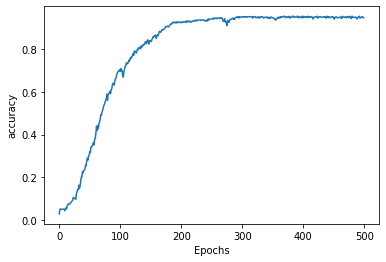

In [12]:
plot_graphs(history, 'accuracy')


In [13]:
seed_text = "Laurence went to dublin"
next_words = 100
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Laurence went to dublin be little milliner milliner little milliner eyes glisten forget nelly died weeks stepped i stepped i three again again again fainted weeks again again saw steps at steps steps steps steps lanigans ball rose me all steps at me all as academy hearty hearty nonsensical as rose eyes one eyes dolans eyes dolans forget hadnt odaly odaly odaly odaly odaly odaly odaly twas nolans swore hed go no further water further red swore swore odaly odaly odaly odaly that milliner milliner little milliner milliner little milliner milliner eyes rows swore odaly odaly odaly odaly odaly odaly odaly odaly that milliner
